# Introduction
In Part I, data in an Excel file containing two different sheets has been obtained. The two sheets have been read. Then, combined them and performed simple cleaning by removing the negative quantities. In this Part, data in the column has been visualized.

In this notebook, the following has been done:
1. Import pandas and data visualization libraries
2. Visualize the column data
    - univariate analysis
    - bivariate analysis

### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn as sns
- numpy as np

In [1]:
# Step 1: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

### Step 2: Read the CSV from Part I
Time to read the CSV obtained from Part I. 
1. Parse dates as True
2. Make the InvoiceDate column as the index of the DataFrame

In [2]:
# Step 2: Read CSV from Part I
data = pd.read_csv('DataFrame.csv', parse_dates=True, index_col=['InvoiceDate'])
display(data)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


## Univariate analysis (UA)
In this section, the data in each column would be examined either by summarizing the information, getting the frequency, and visualizing it using graphs. Univariate analysis (UA) refers to looking at a single variable/column's values, and performing some kind of analysis on it. 

For continuous numerical values, we will be using <strong>histograms</strong>.

### Step 3: Create a new column named "Revenue"
Before plotting numerical features using histograms, create a new column named "Revenue", where it is "Price" multiplied by "Quantity".

In [3]:
# Step 3: Create a new column named "Revenue"
data['Revenue'] = data['Price'] * data['Quantity']
data

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


### Step 4: Perform UA on 'Quantity' with a histogram
Plot a histogram to see the distribution of Quantity. 

In [4]:
print(max(data['Quantity']))

80995


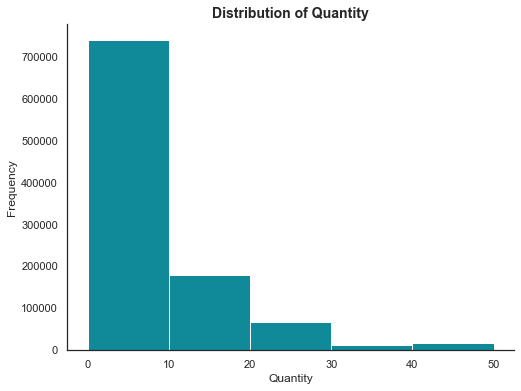

In [5]:
# Step 4: Plot histogram using 'Quantity'
sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
plt.figure(figsize = (8, 6)) # determine the size of the figure
plt.hist(data["Quantity"], # the variable on which to create the histogram
         bins = [0,10,20,30,40,50], # create a histogram with 6 bins
         color = "#108A99")
plt.title("Distribution of Quantity", fontsize = 14, weight = "bold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
sns.despine() # removes the top and right border of graph
plt.show()

### Step 5: Perform UA on log-transformed 'Quantity' with a histogram
As shown above, that's a right-skewed distribution. Let's transform the values in the Quantity column using numpy's method, and then plot again. 

Transform right-skewed to a normal distribution

In [6]:
# Step 5: Plot the log transformed version of Quantity
data['log_base10_Quantity'] = np.log10(data['Quantity'])
data

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,log_base10_Quantity
InvoiceDate,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,1.079181
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,1.079181
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,1.079181
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,1.681241
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,1.380211
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,0.778151
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,0.602060
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,0.602060


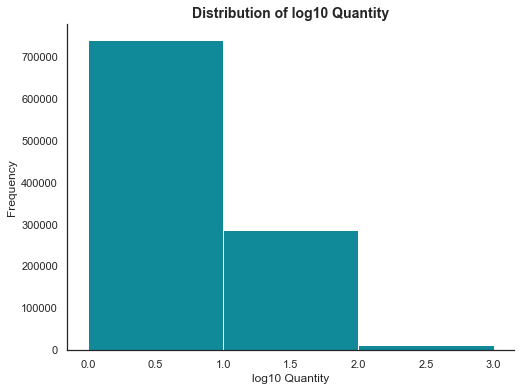

In [7]:
sns.set_style("white")
plt.figure(figsize = (8, 6)) 
plt.hist(data['log_base10_Quantity'], 
         bins = [0,1,2,3], 
         color = "#108A99")
plt.title("Distribution of log10 Quantity", fontsize = 14, weight = "bold")
plt.xlabel("log10 Quantity")
plt.ylabel("Frequency")
sns.despine() 
plt.show()

### Step 6: Plot UA on 'Price' with a histogram
After 'Quantity', let's take a look at 'Price'. 

Same thing - use a histogram to visualize the distribution of the 'Price' of the items in the dataset. 

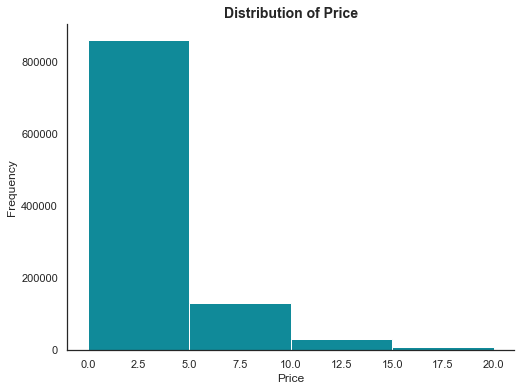

In [8]:
# Step 6: Plot a histogram using 'Price'
sns.set_style("white")
plt.figure(figsize = (8, 6)) 
plt.hist(data["Price"], 
         bins = [0,5,10,15,20],
         color = "#108A99")
plt.title("Distribution of Price", fontsize = 14, weight = "bold")
plt.xlabel("Price")
plt.ylabel("Frequency")
sns.despine() 
plt.show()

### Step 7: Perform UA on log-transformed 'Price' with a histogram
Similarly, the skew is strong so let's see if a log transformation can help.

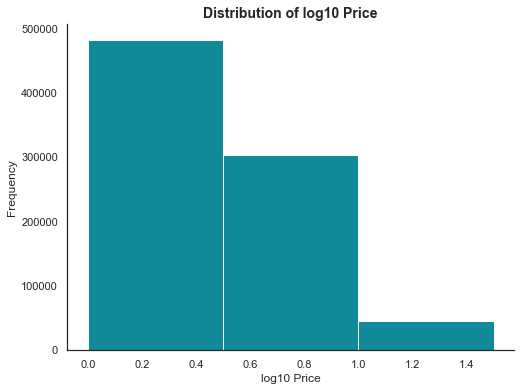

In [9]:
# Step 7: Plot log-transformed Price with a histogram
data['log_base10_Price'] = np.log10(data['Price'])

sns.set_style("white") 
plt.figure(figsize = (8, 6)) 
plt.hist(data['log_base10_Price'], 
         bins = [0,0.5,1,1.5], 
         color = "#108A99")
plt.title("Distribution of log10 Price", fontsize = 14, weight = "bold")
plt.xlabel("log10 Price")
plt.ylabel("Frequency")
sns.despine() 
plt.show()

### Step 8: Plot UA on 'Revenue' with a histogram
Last one - let's look at Revenue using histogram.

Before plotting, imagine how the shape of the resulting histogram would look like, since Revenue has been derived from the product of Price and Quantity. 

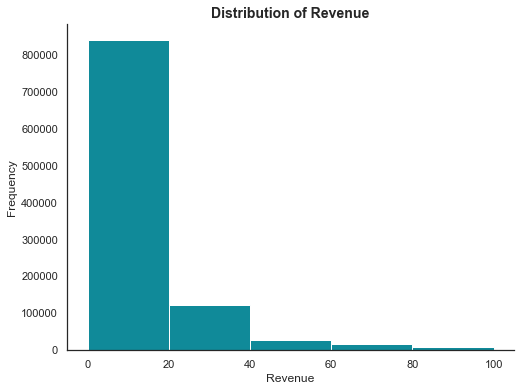

In [10]:
# Step 8: Plot a histogram using Revenue
sns.set_style("white") 
plt.figure(figsize = (8, 6)) 
plt.hist(data["Revenue"],
         bins = [0,20,40,60,80,100], 
         color = "#108A99")
plt.title("Distribution of Revenue", fontsize = 14, weight = "bold")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
sns.despine() 
plt.show()

### Step 9: Perform UA on log-transformed 'Revenue' with a histogram
Let's do a log transformation of Revenue and plot it as well. 

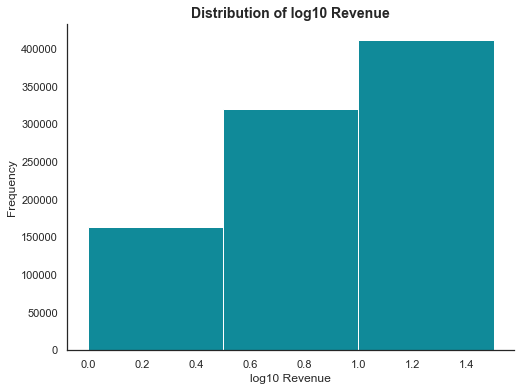

In [11]:
# Step 9: Plot the log-transformed Revenue with a histogram
data['log_base10_Revenue'] = np.log10(data['Revenue'])

sns.set_style("white") 
plt.figure(figsize = (8, 6))
plt.hist(data['log_base10_Revenue'], 
         bins = [0,0.5,1,1.5], 
         color = "#108A99")
plt.title("Distribution of log10 Revenue", fontsize = 14, weight = "bold")
plt.xlabel("log10 Revenue")
plt.ylabel("Frequency")
sns.despine() 
plt.show()

Even after the transformation none of the three quantities looked normally distributed at all, with no bell curve. 

### Step 10: Plot 'Quantity' over time
Let's see how many items are purchased over the time period. 

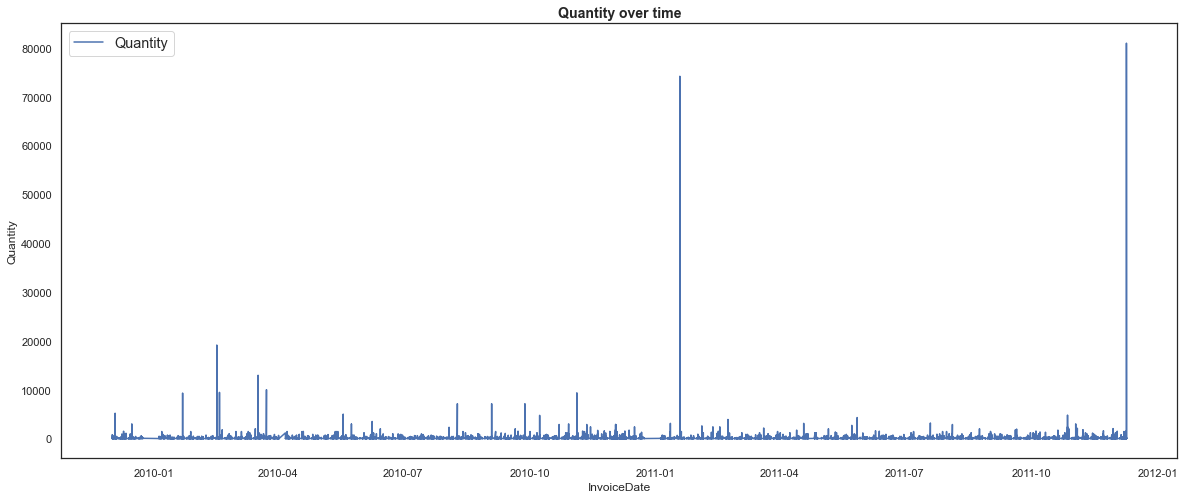

In [12]:
# Step 10: Plot 'Quantity' over time with a .plot
labels = ["Quantity"] # legend labels list
plt.figure(figsize = (20, 8))
plt.plot(data.index.values, data["Quantity"])

# chart formatting elements: title, labels and legend
plt.title("Quantity over time", fontsize = 14, fontweight = "bold")
plt.ylabel("Quantity")
plt.xlabel("InvoiceDate")
plt.legend(labels = labels, fontsize = "large")
plt.show()

## Bivariate analysis (BA)
Bivariate analysis is a form of analysis where the relationship between two variables has been examined. This is usually executed with graphing techniques such as a scatterplot, or boxplots. 

### Step 11: Plot a BA for Quantity against Price with a scatter plot
See if there's a relationship between 'Quantity' and 'Price' column. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


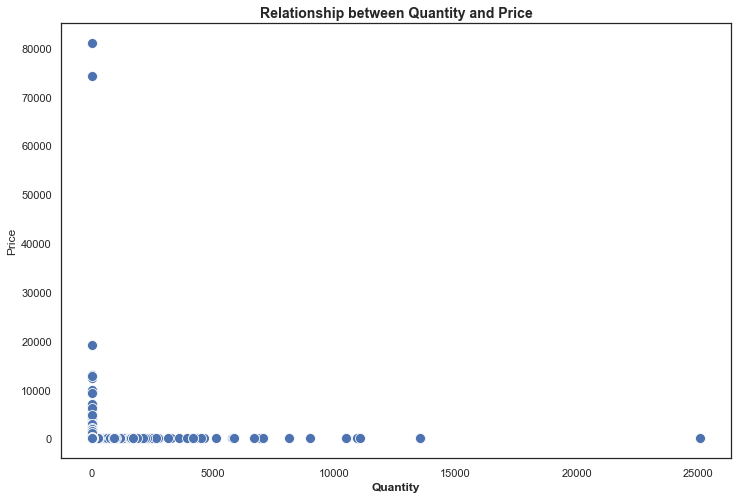

In [13]:
# Step 11: Plot 'Quantity' against 'Price' with a scatter plot
plt.figure(figsize = (12, 8))
sns.scatterplot(data['Price'],
                data['Quantity'],
                s = 100) # size of points on the scatter
plt.title("Relationship between Quantity and Price", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Quantity", weight = "bold")
plt.ylabel("Price")
plt.show()

### Step 12: Plot BA for log-transformed Quantity and log-transformed Price
It seems like data transformation is needed to see if there's a more obvious relationship. 

Plot the log-transformed Quantity with log-transformed Price with a scatter plot, and assess if there is a more coherent relationship.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


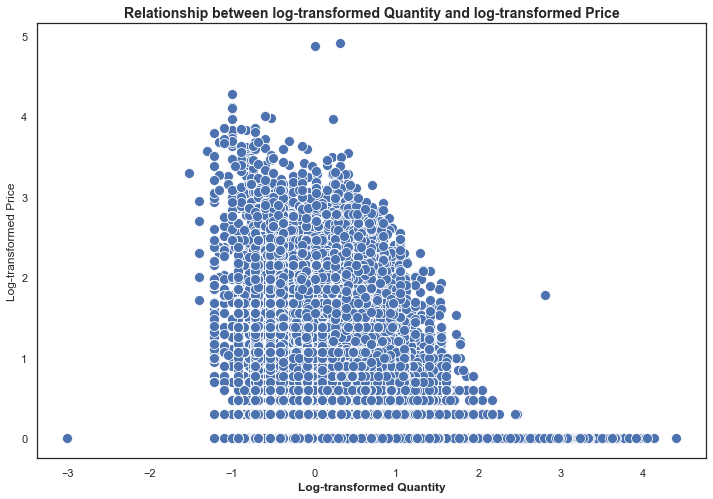

In [14]:
# Step 12: Plot log-transformed Quantity against log-transformed Price
plt.figure(figsize = (12, 8))
sns.scatterplot(data['log_base10_Price'],
                data['log_base10_Quantity'],
                s = 100) # size of points on the scatter
plt.title("Relationship between log-transformed Quantity and log-transformed Price", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Log-transformed Quantity", weight = "bold")
plt.ylabel("Log-transformed Price")
plt.show()

### Step 13: Export the new DataFrame with 'Revenue' as a new CSV
As a new column called 'Revenue' has been created in Step 3, let's export this DataFrame as a new CSV.

Will need 'Revenue' information for Parts III-V ahead.

In [15]:
# Step 13: Export the DataFrame with 'Revenue' as a CSV
data.to_csv ('Revenue.csv')

Done! In the next part, pretend that we are an employee of the store and perform some store-relevant analysis.